In [2]:
import tensorflow as tf
tf.__version__

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Convolutional Neural Network Example -> Build a Convolutional Neural Network With Tensorflow

You have an input, and in the architecture of AlexNet CNN, at the end, what they do is increase the number of feature maps and decrease the number of dimensions. Once that has been done, they flatten the whole thing out. After flattening, they form dense layers across it. The reason why we do not directly go for an output of 10 neurons after flattening is because we use the MNIST dataset here, which has values from 0 to 9.

In [5]:
#Lets import necessory libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D

from keras import utils


import keras
from keras.datasets import mnist

#### CV2 ->

OpenCV, short for Open Source Computer Vision Library, is a popular open-source library used for computer vision tasks. It provides a wide range of tools and functions that help developers and researchers manipulate images and videos to perform tasks like object detection, facial recognition, image enhancement, and more. OpenCV is widely used in applications involving image and video processing, machine learning, and artificial intelligence.

#### Sequential Model ->

In a Sequential model, each layer is followed by another layer, and then another, forming a sequence.

So, we import models of the Sequential kind to create a model where layers are stacked one after another.

In Layers, we import: Dense, Dropout, Activation, Flatten.

#### Dense Layer ->

Dense layers are used to create fully connected layers.

#### Dropout Layer ->

Dropout involves randomly "dropping out" (ignoring) some units during training to prevent overfitting.

#### Activation ->

Used to apply an activation function to introduce non-linearity.

#### Flatten ->

Flattening means converting the data into a 1-dimensional array for subsequent processing, typically before feeding it into a fully connected layer for classification.

In convolutional models, features are extracted using convolutional layers, which are then fed into dense layers to produce the final output.

#### From Keras.layers import Conv2D, MaxPooling2D

So, these two layers, Conv2D and MaxPooling2D, are basically layers that we will be adding to our already dense models.

"We have a Dense Layer, and then we have two more layers that we will be adding: Conv2D and MaxPooling2D. These two layers we will be using."

From Keras.utils import utils

utils is basically used to plot the models.

np.utils -> This is basically what we will be using to convert categorical values to numerical categorical.

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
y_train[0]

5

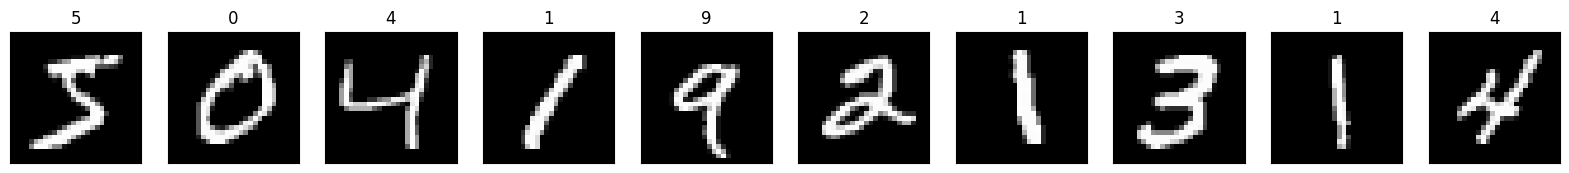

In [8]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


set_visible(False) -> We will not able to see axis values the whole grid  thing not be able to see .

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1) #1 is for how much channel we use

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
# Convert x_train and x_test to 'float32' type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize x_train and x_test data by dividing by 255 (assuming RGB values)
x_train /= 255
x_test /= 255

# Define the number of classes (assuming it's 10 in this case)
num_classes = 10

# Convert y_train and y_test labels into one-hot encoded format using np.eye
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]


First Line of Code: We are converting integer values to float values. The reason we are doing this is to make it easier when convoluting the entire input and output data of the same datatype.

When we write x_train /= 255, it means if the color value lies between [0-255]:



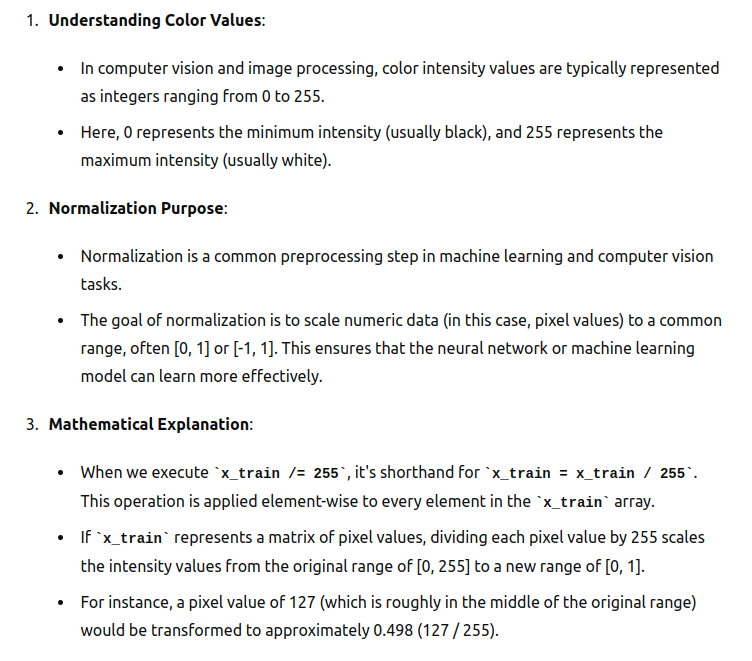

0 represents black.


1 represents white.


By dividing the entire range by 255, 0 remains 0, representing black. 255 becomes 1, acting as a weight. This means our values now range between [0-1]. Dividing by 255 normalizes the data.



For categorical values:



Y_train[0] for a categorical value of 5 becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
# Import necessary modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the sequential model
model = Sequential()

# Add a 2D convolutional layer with 32 filters, each of size 3x3,
# ReLU activation, He uniform kernel initializer, and input shape of (28, 28, 1)
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

# Add a max pooling layer with pool size 2x2
model.add(MaxPooling2D((2, 2)))

# Flatten the 2D arrays into a 1D array for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 100 neurons, ReLU activation,
# He uniform kernel initializer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

# Add an output layer with 10 neurons (since there are 10 classes in MNIST dataset),
# softmax activation function for multi-class classification
model.add(Dense(10, activation='softmax'))


### Conv2D


The first parameter in conv2d is the number of filters we will be using in this image. We use 32 filters of size (3,3). Since all the filters are of size (3x3), the activation 'Relu' means after convolution.

Firstly, we have the multiplication of the values, and those values are finally added up. This is basically what a linear model can look like.

So, to add non-linearity, we always need to add an activation function.

We don't have to worry about the ReLU causing the problems of gradient explosion and vanishing gradient because we just have one convolution layer and our model is very small.

#### Kernel Initializer



The weight initializer is basically when we have all weights in MLP. So, we had wx + b, where b is bias. The weight we will be using when we first start to build the model will randomly initialize the weights. Weights can come from a normal distribution. At this time, these weights are basically kernels. So, instead of one weight, we have kernel values, and these kernel values come from He_uniform.

#### Conv2D




In Conv2D, you place the kernel in the image, then you shift in the right direction to get the value. At the same time, you also shift in the downward direction to get the value. Since the kernel is shifted in two directions, we have Convolution 2D.

#### MaxPooling2D


MaxPooling is also 2D because the kernel moves in two different directions.

#### Activation ->

Softmax


Why Softmax? Softmax converts random values to probabilities. So, if you want the probability of a particular image belonging to class 0, you use softmax.



0.56, 0.7, 0.12, 0.25, 0.4, 0.3, 0.2, 0.1, 0.6, 0.4 -> We cannot change the output. If we sum these values, we get 1. This type of output we get.

In [13]:
# Lets plot the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

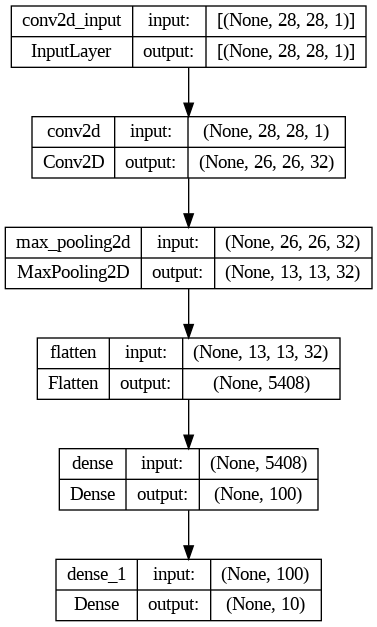

In [14]:
# Visualize the model architecture with shapes
utils.plot_model(model, show_shapes=True)


In [15]:
# Compile the model with categorical crossentropy loss function, Adam optimizer,
# and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using training data (x_train and y_train)
# - batch_size: Number of samples per gradient update
# - epochs: Number of epochs to train the model
# - verbose: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
# - validation_data: Data on which to evaluate the loss and any model metrics
history = model.fit(x_train, y_train, batch_size=32, epochs=2, verbose=1, validation_data=(x_test, y_test))


Epoch 1/2
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1360 - accuracy: 0.9598 - val_loss: 0.0599 - val_accuracy: 0.9805
Epoch 2/2
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0471 - val_accuracy: 0.9847


## Verbose ->

You will get the data loss,time,accuracy ,val_loss

In [ ]:
model.save('mnist_cnn_model.h7')

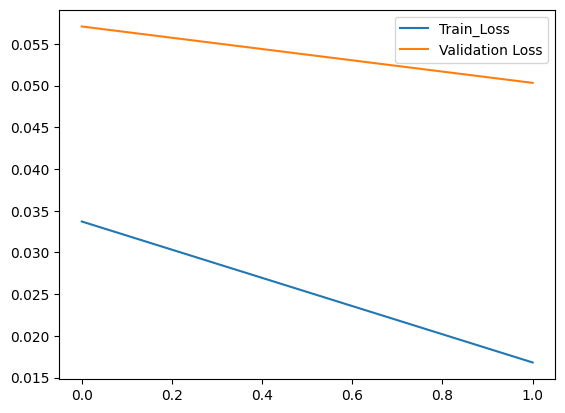

In [ ]:
plt.plot(model.history.history['loss'],label='Train_Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

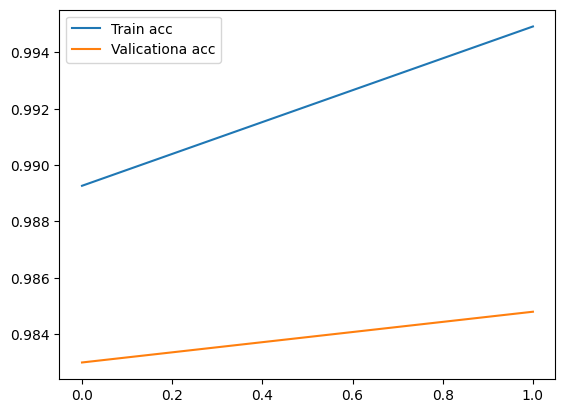

In [ ]:
plt.plot(model.history.history['accuracy'],label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Valicationa acc')
plt.legend()

In [ ]:
model=keras.models.load_model('mnist_cnn_model.h7')

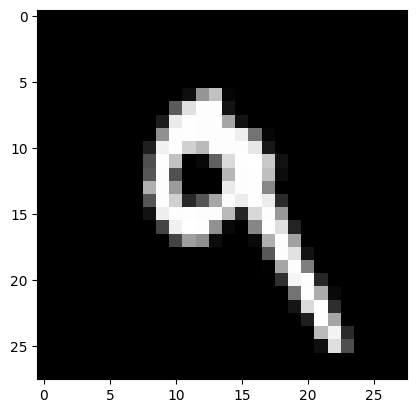

In [ ]:
plt.imshow(x_test[7],cmap='gray')

In [ ]:
x=np.reshape(x_test[2],(1,28,28,1))
np.argmax(model.predict(x))

1/1 [==============================] - 0s 106ms/step


1

In [1]:
#AI/ML Trainer- Saurav
#Date - 13 June 2024
#Time - 13:47